# Step 3 - Model Selection
* The data comes with 30 features based on the results from the tests ran for cancer patients
* Our group will choose 10 features that have the best predictive capabilities indicating when a tumor is likely malignant or benign 


In [2]:
#Dependencies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns 
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
#from sklearn.cross_validation import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics

In [15]:
#Read in csv that was renamed in step 1
df = pd.read_csv("Resources/clean_model_data.csv",header=0)
#df.head()

In [18]:
#Show dimensions of data rows by columns
df.shape #only 31 bc pt-id was removed for this dataset

(569, 31)

# Features Selection
* In order to find the mean features to use for the prediction of the tumor based on user input (malignant or benign), we will use a few correlation matrixes and plots to help us visualize which features correlate to which diagnosis.
* The data headers are separated by *'mean'*, *'se'*, and *'worst'*. We will find the features that correlate most to the Dx and isolate those to use for our ML model
* This will allow us to find the features that when put together are likely to be malignant and that way we can create thresholds for future prediction of B or M in our model.
* We need to also find the features that are not useful and drop them from the data to remove noise. 

# MEAN

In [19]:
#Selecting columns with iloc to select 'mean' features that will be used for the model
df_mean=df.iloc[:,0:11] 
df_mean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [20]:
#Inspect data
df_mean.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [38]:
#df.columns

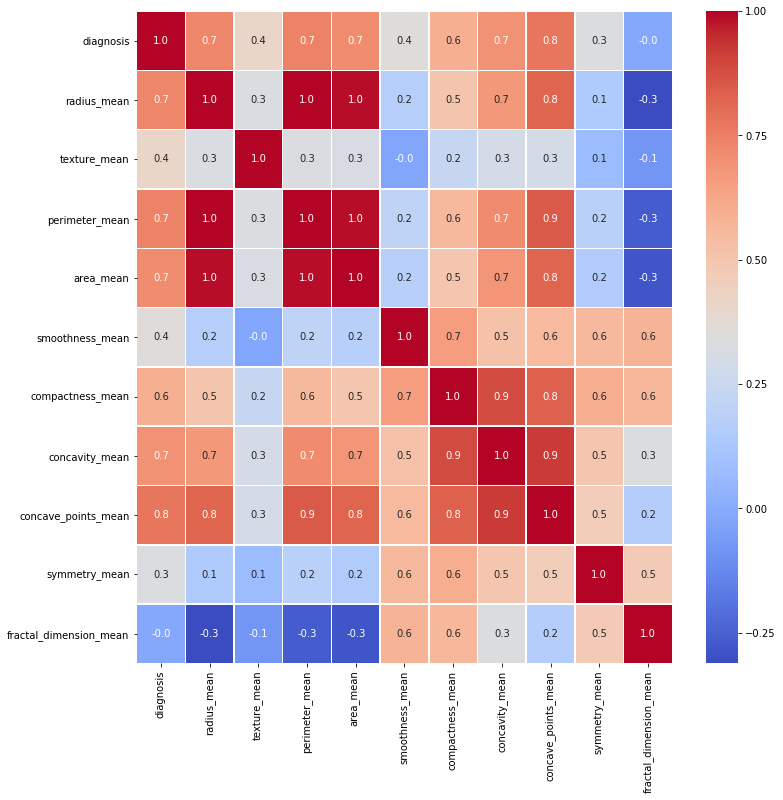

In [32]:
# 1- Correlation Matrix 
f,ax = plt.subplots(figsize=(12, 12))
sns_plot=sns.heatmap(df_mean.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='coolwarm')

* Based on the comparison matrix above, the following features are correlated with Dx.:
 - 'radius_mean'
 - 'perimeter_mean'
 - 'area_mean'
 - 'concavity_mean'
 - 'concave_points_mean'

#### Note: The most highly correlated ones are: 'radius_mean', 'perimeter_mean', 'area_mean' which will be used for the final model
_______________________________________________________________________

# SE
### We will now look through the SE column to find correlations

In [44]:
#df.columns

In [41]:
# Selected features + Dx
df_se= df[['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave_points_se','symmetry_se','fractal_dimension_se']]
df_se.head()

,diagnosis,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se
0,1,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,1,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,1,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,1,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


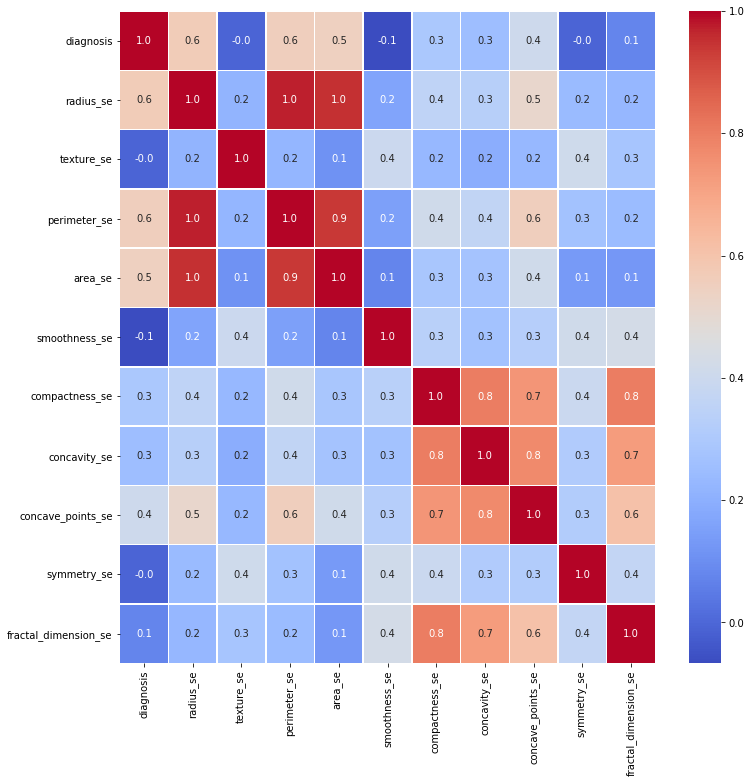

In [42]:
# 2- Correlation Matrix 
f,ax = plt.subplots(figsize=(12, 12))
sns_plot=sns.heatmap(df_se.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='coolwarm')

In [43]:
#sns_plot.figure.savefig("se_correlation.png")

* Based on the comparison matrix above, the following features do not show a high correlation with Dx (0.6), therefore these will not be used to create model 
 - 'radius_se'
 - 'perimeter_se'
_________________________________________________________________________

# WORST

In [47]:
#df.columns

In [46]:
df_worst= df[['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
df_worst.head()

,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


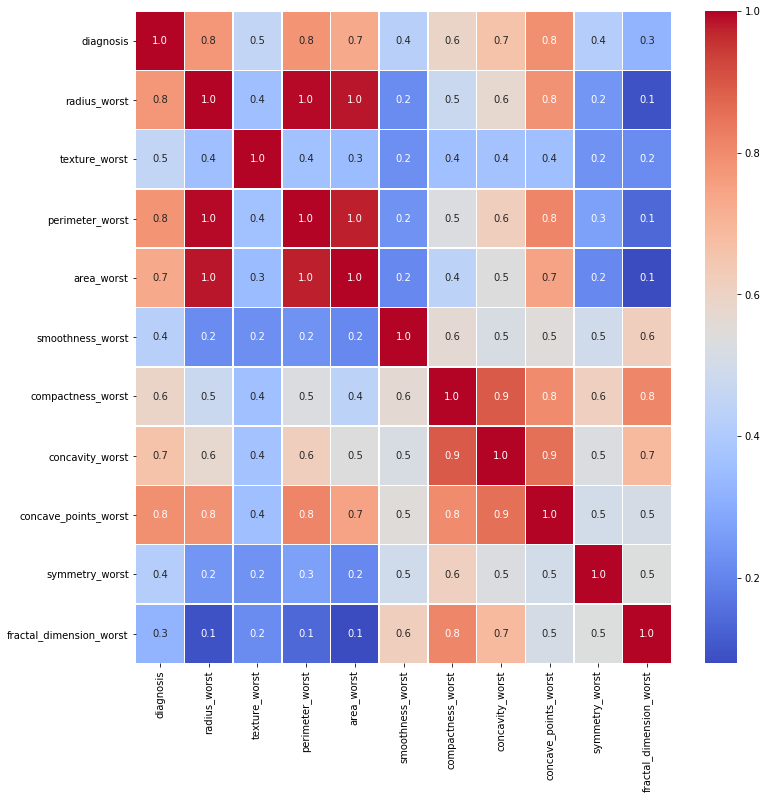

In [49]:

f,ax = plt.subplots(figsize=(12, 12))
sns_plot=sns.heatmap(df_worst.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = 'coolwarm')

* Based on the comparison matrix above, the following features are correlated with Dx.:
- 'radius_worst'
- 'perimeter_worst'
- 'area_worst'
- 'concavity_worst'
- 'concave-points_worst'

#### Note: The most highly correlated ones are: 'radius_worst', 'perimeter_worst', 'area_worst' which will be used for the final model

In [ ]:
# In the next step we will graph all features and separate them between Benign and Malignant 